
# <center> Cirrhosis Patient Survival Prediction <center> 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Load the dataset
data = pd.read_csv('cirrhosis.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
# Display the data types of each column
print(data.dtypes)

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [7]:
# Check for missing values in each column
print(data.isnull().sum())

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [9]:
data.duplicated().sum()

0

In [11]:
data.shape

(418, 20)

In [13]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


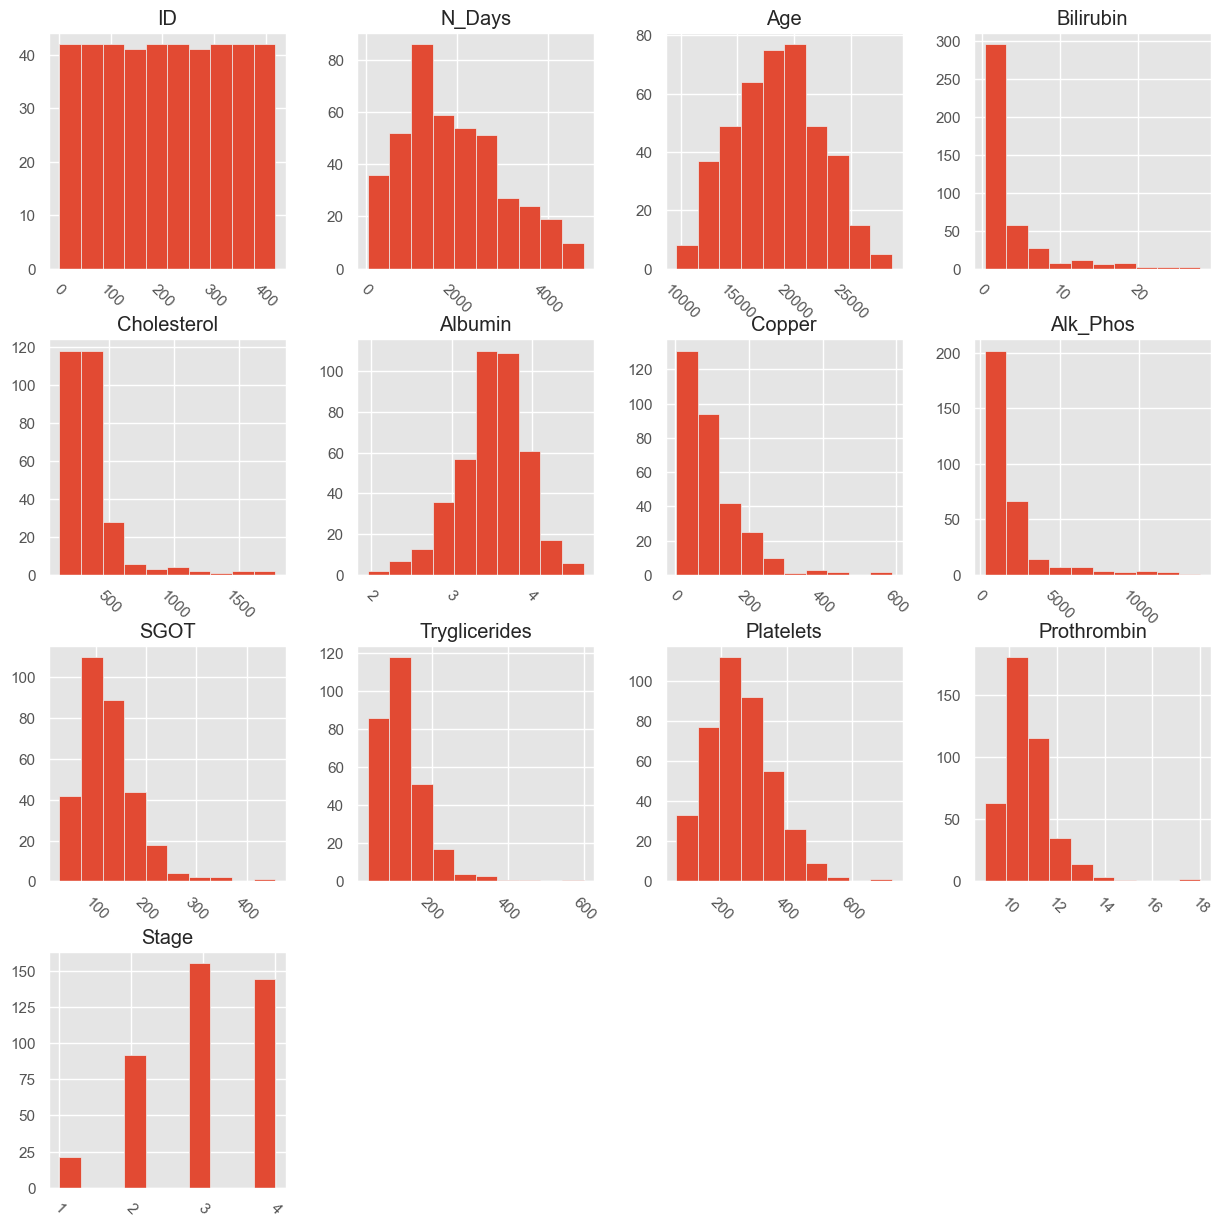

In [15]:
data.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [17]:
data.dtypes[data.dtypes=='object']

Status          object
Drug            object
Sex             object
Ascites         object
Hepatomegaly    object
Spiders         object
Edema           object
dtype: object

In [19]:
data['Stage'].value_counts()

Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

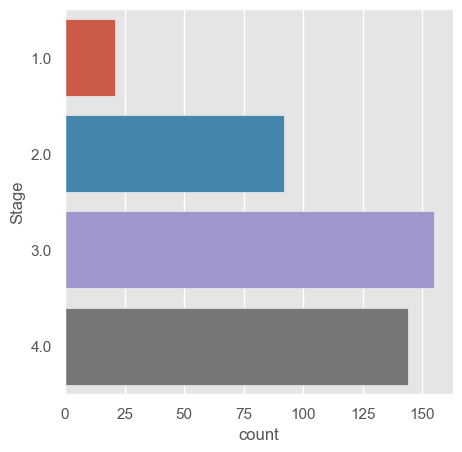

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(y='Stage', data=data)
plt.show()

In [23]:
data['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

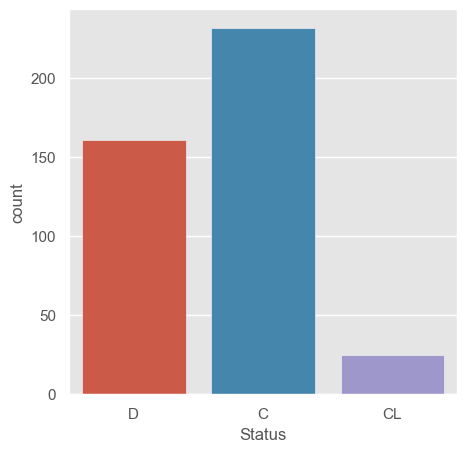

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x='Status', data=data)
plt.show()

In [27]:
data['Drug'].value_counts()

Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

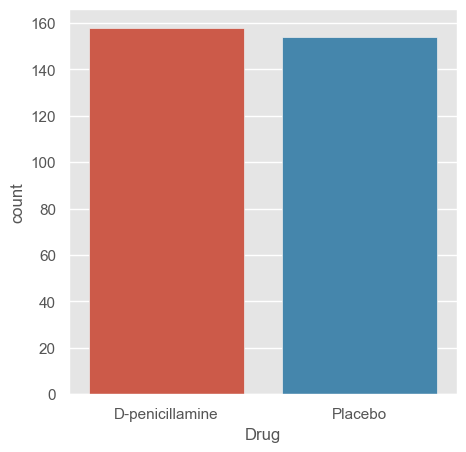

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x='Drug', data=data)
plt.show()

In [31]:
data['Sex'].value_counts()

Sex
F    374
M     44
Name: count, dtype: int64

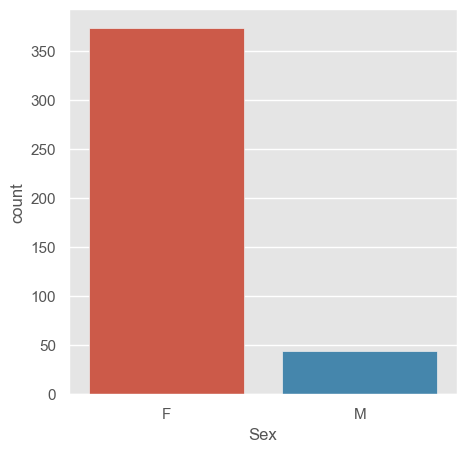

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', data=data)
plt.show()

In [36]:
data['Ascites'].value_counts()

Ascites
N    288
Y     24
Name: count, dtype: int64

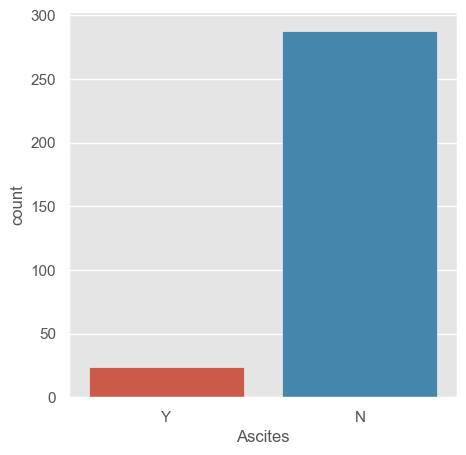

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x='Ascites', data=data)
plt.show()

In [40]:
data['Hepatomegaly'].value_counts()

Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

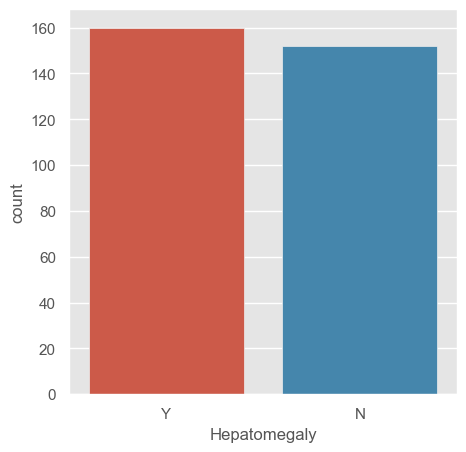

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(x='Hepatomegaly',data=data)
plt.show()

In [44]:
data['Spiders'].value_counts()

Spiders
N    222
Y     90
Name: count, dtype: int64

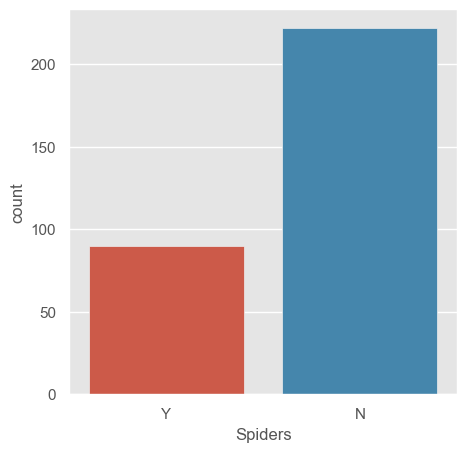

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(x='Spiders',data=data)
plt.show()

In [48]:
data['Edema'].value_counts()

Edema
N    354
S     44
Y     20
Name: count, dtype: int64

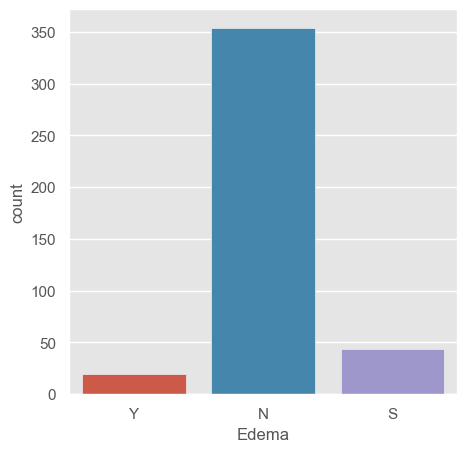

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x='Edema',data=data)
plt.show()

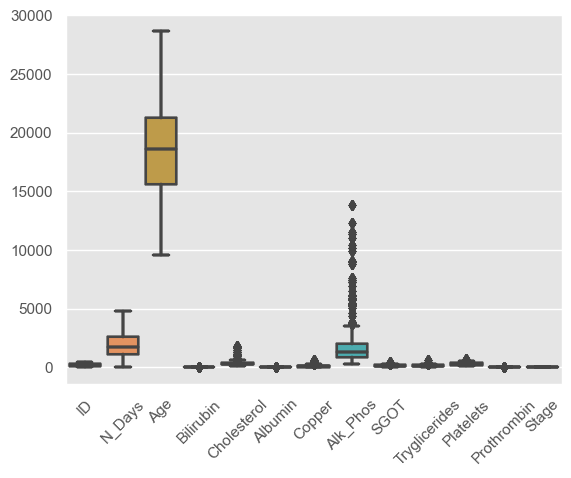

In [52]:
for i in data:
    sns.boxplot(data)
    plt.xticks(rotation = 45)

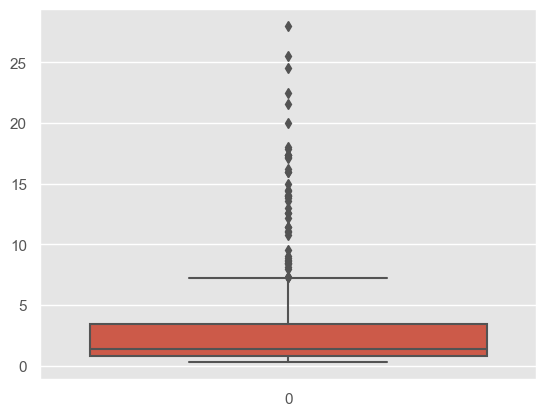

In [54]:
sns.boxplot(data=data['Bilirubin'])
plt.show()

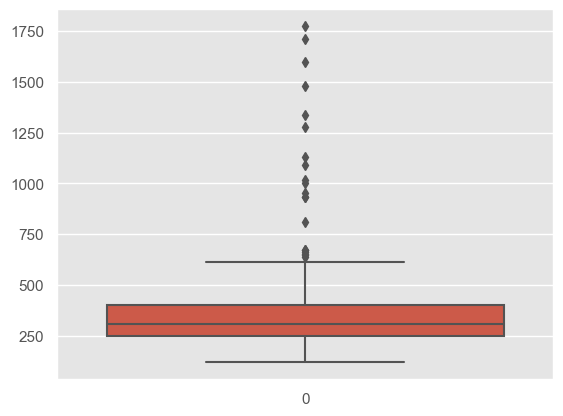

In [58]:
sns.boxplot(data=data['Cholesterol'])
plt.show()

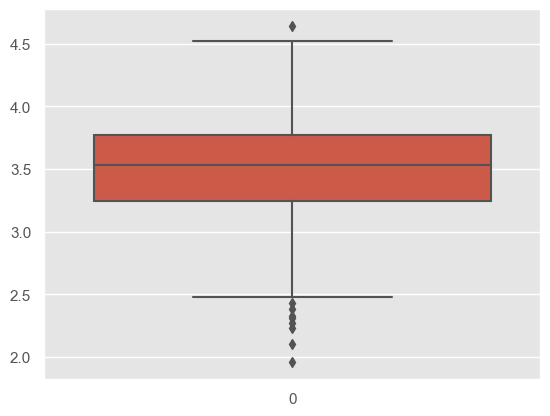

In [60]:
sns.boxplot(data=data['Albumin'])
plt.show()

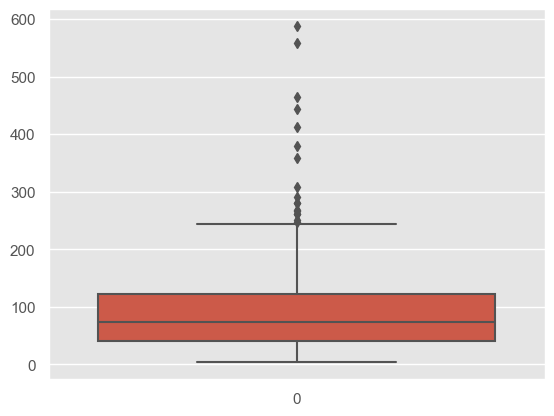

In [62]:
sns.boxplot(data=data['Copper'])
plt.show()

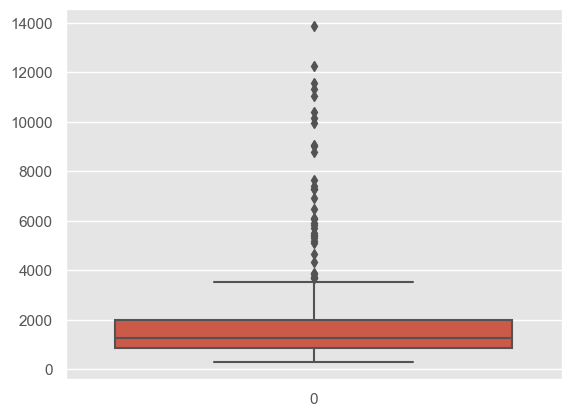

In [64]:
sns.boxplot(data=data['Alk_Phos'])
plt.show()

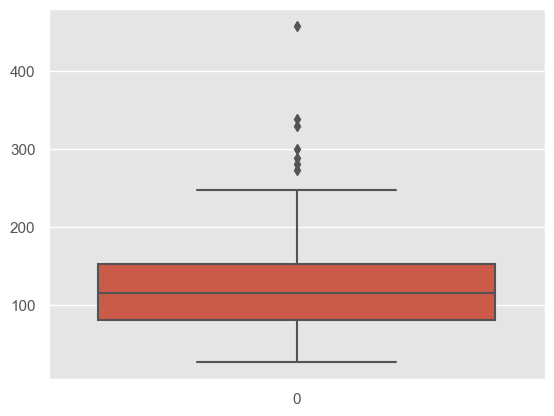

In [66]:
sns.boxplot(data=data['SGOT'])
plt.show()

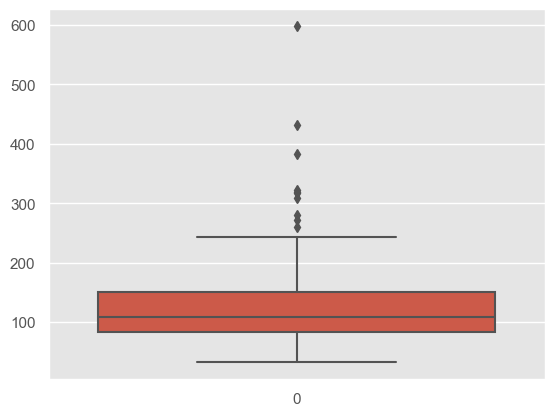

In [68]:
sns.boxplot(data=data['Tryglicerides'])
plt.show()

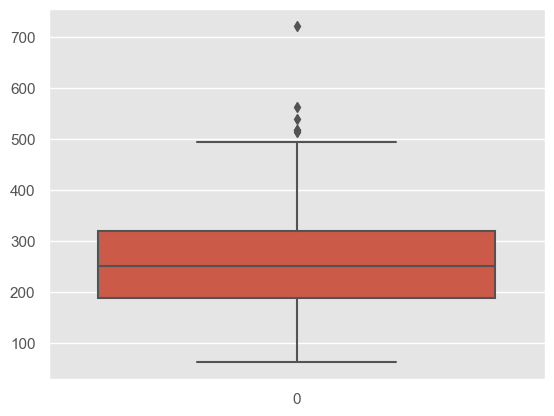

In [70]:
sns.boxplot(data=data['Platelets'])
plt.show()

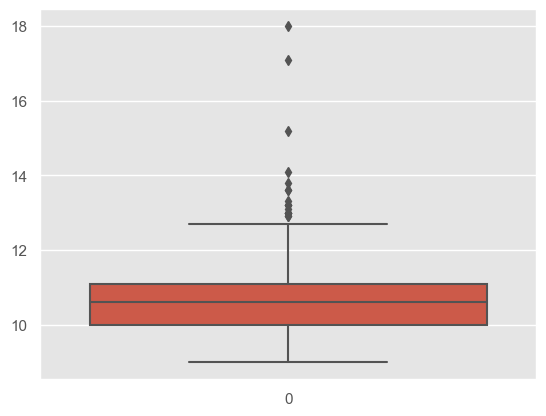

In [72]:
sns.boxplot(data=data['Prothrombin'])
plt.show()

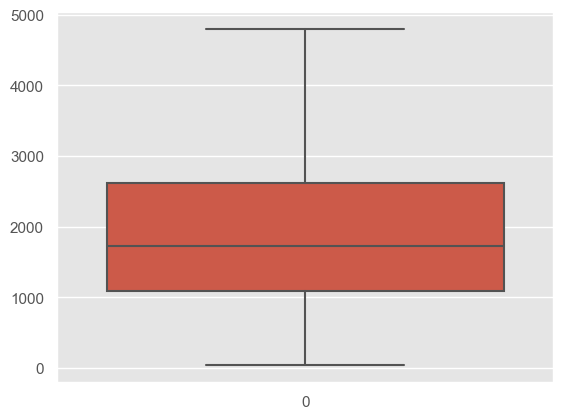

In [76]:
sns.boxplot(data=data['N_Days'])
plt.show()

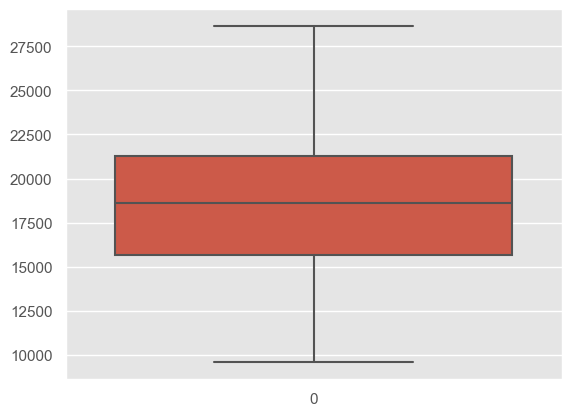

In [78]:
sns.boxplot(data=data['Age'])
plt.show()

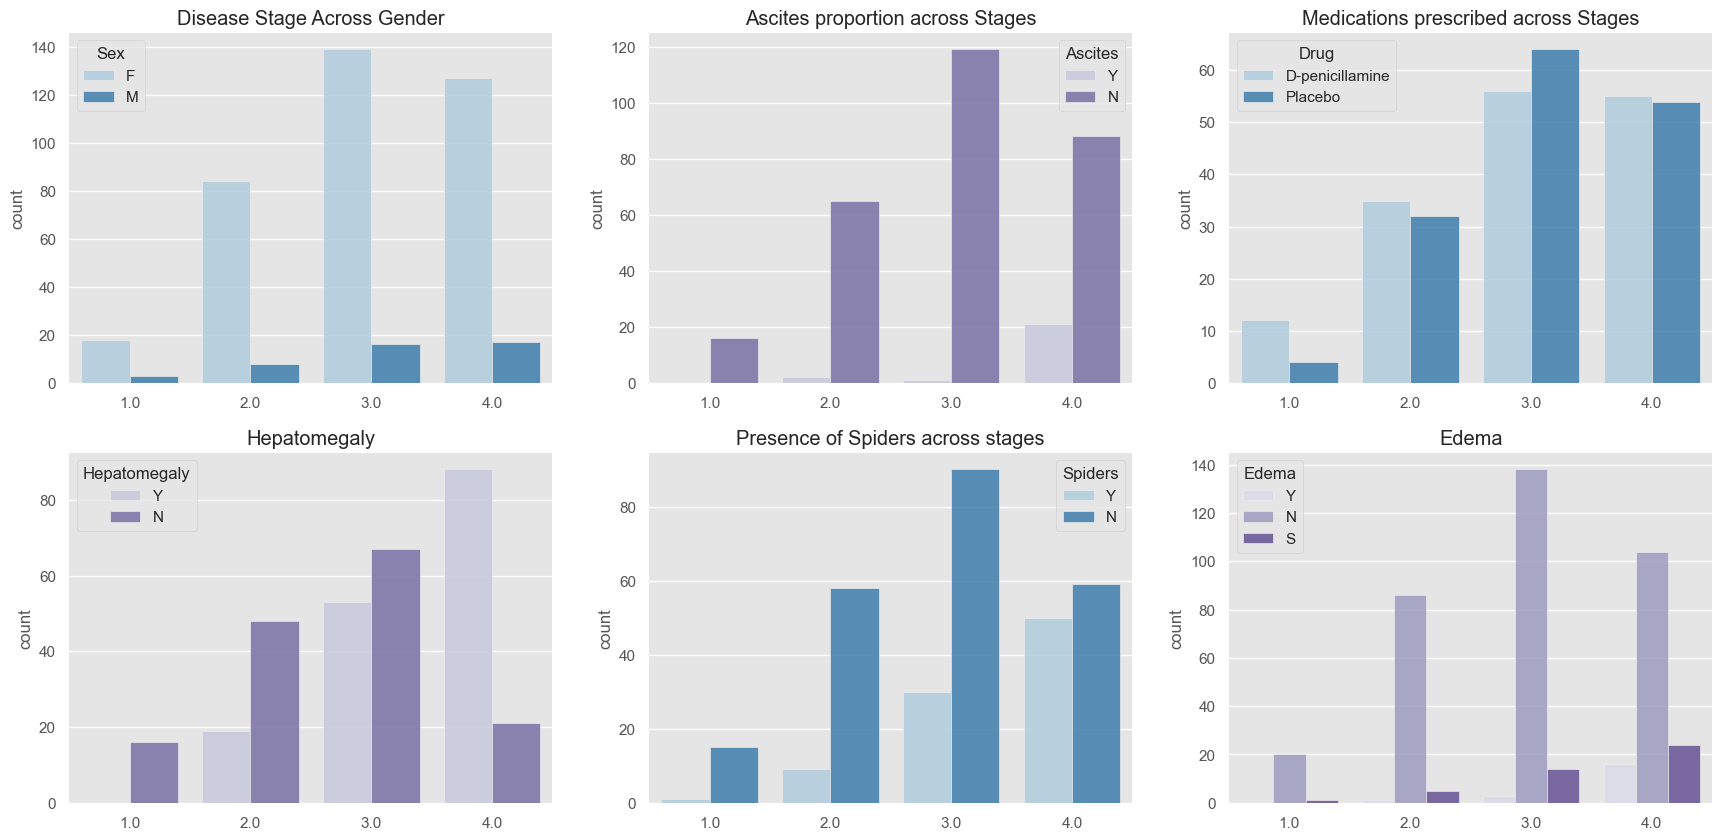

In [80]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=data['Stage'], hue=data['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=data['Stage'], hue=data['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=data['Stage'], hue=data['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=data['Stage'], hue=data['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=data['Stage'], hue=data['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=data['Stage'], hue=data['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

In [82]:
# Create a copy of the DataFrame for preprocessing
data_preprocessed = data.copy()

# Handling missing values
# For categorical data, replace missing values with the mode
categorical_columns = ['Stage','Sex','Drug', 'Ascites', 'Hepatomegaly', 'Spiders','Edema']
for column in categorical_columns:
    mode_value = data_preprocessed[column].mode()[0]
    data_preprocessed[column].fillna(mode_value, inplace=True)

# For numerical data, replace missing values with the median
numerical_columns = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
for column in numerical_columns:
    median_value = data_preprocessed[column].median()
    data_preprocessed[column].fillna(median_value, inplace=True)

In [84]:
data_preprocessed.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

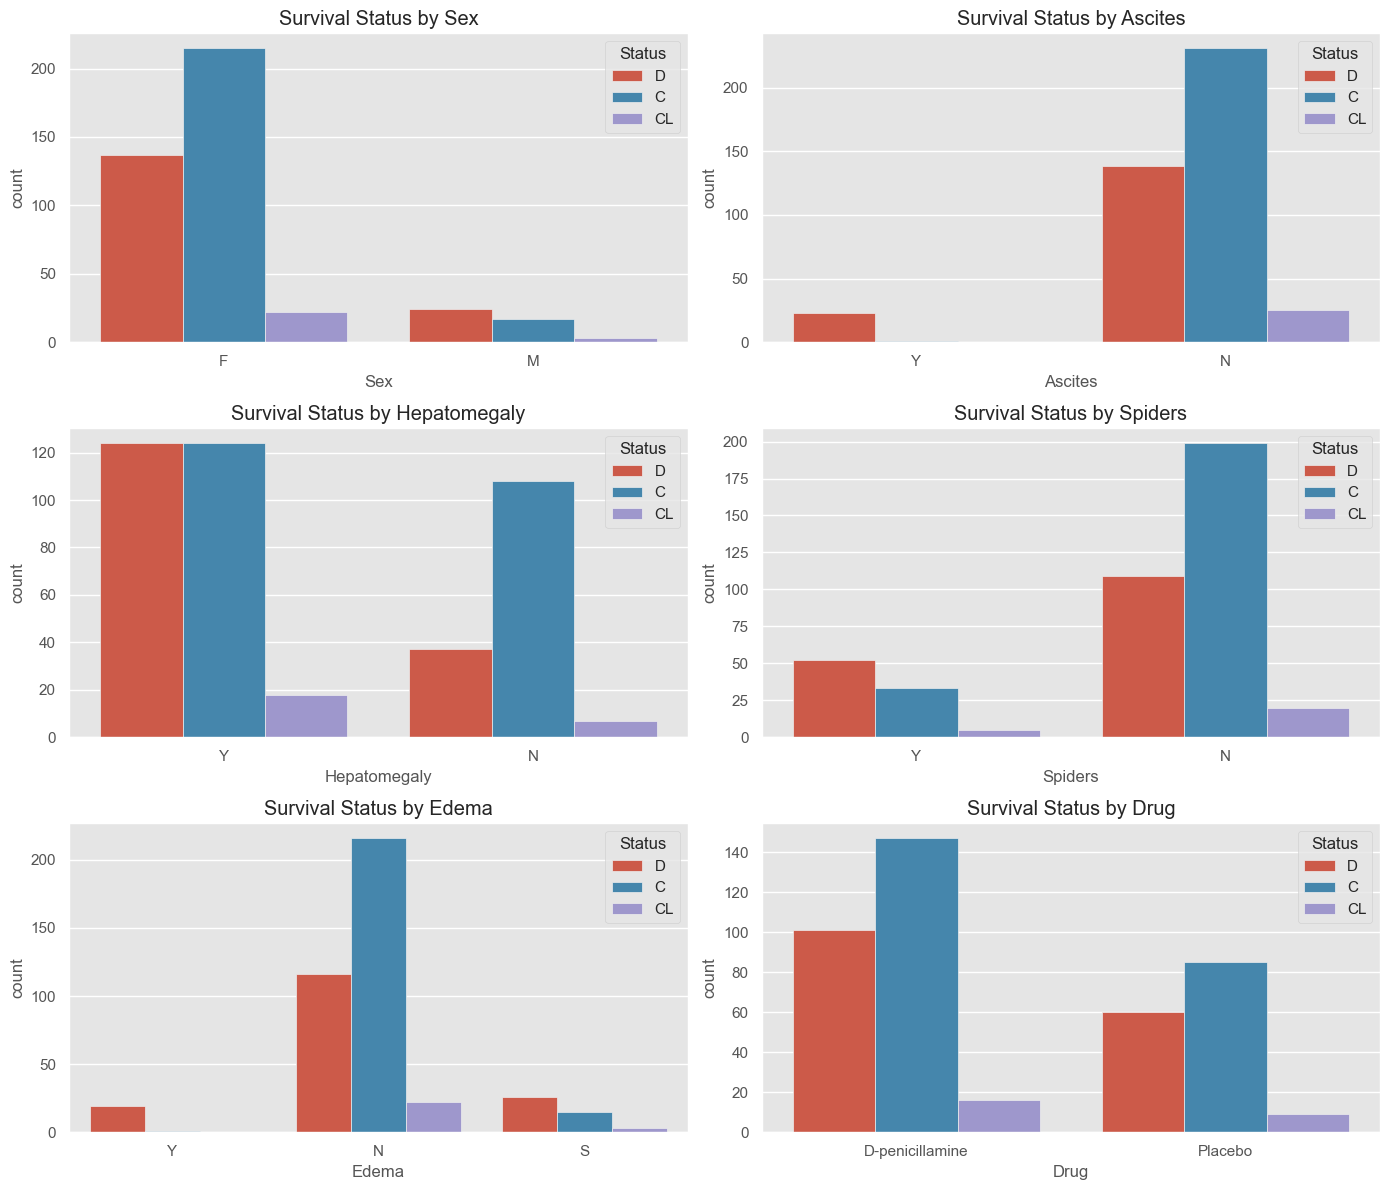

In [88]:
# Analyze the relationship between survival status and categorical features
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
categorical_features = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug']

for i, feature in enumerate(categorical_features):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue='Status', data=data_preprocessed, ax=axes[row, col])
    axes[row, col].set_title(f'Survival Status by {feature}')
    axes[row, col].legend(title='Status', loc='upper right')

plt.tight_layout()
plt.show()

In [90]:
data_preprocessed.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [94]:
# Encode categorical variables
label_encoders = {}
categorical_features = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for feature in categorical_features:
    le = LabelEncoder()
    data_preprocessed[feature] = le.fit_transform(data_preprocessed[feature])
    label_encoders[feature] = le

In [96]:
data_preprocessed.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [98]:
data_preprocessed.Status.value_counts()

Status
0    232
2    161
1     25
Name: count, dtype: int64

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [104]:
# Splitting the data into training and testing sets
X = data_preprocessed.drop(['Status'], axis=1)
y = data_preprocessed['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [326]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 319 to 331
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             334 non-null    int64  
 1   N_Days         334 non-null    int64  
 2   Drug           334 non-null    int32  
 3   Age            334 non-null    int64  
 4   Sex            334 non-null    int32  
 5   Ascites        334 non-null    int32  
 6   Hepatomegaly   334 non-null    int32  
 7   Spiders        334 non-null    int32  
 8   Edema          334 non-null    int32  
 9   Bilirubin      334 non-null    float64
 10  Cholesterol    334 non-null    float64
 11  Albumin        334 non-null    float64
 12  Copper         334 non-null    float64
 13  Alk_Phos       334 non-null    float64
 14  SGOT           334 non-null    float64
 15  Tryglicerides  334 non-null    float64
 16  Platelets      334 non-null    float64
 17  Prothrombin    334 non-null    float64
 18  Stage        

In [342]:
y_train.nunique()

3

In [316]:
X_test.shape

(84, 19)

In [320]:
y_train.shape

(334,)

In [322]:
y_test.shape

(84,)

In [324]:
y.value_counts()

Status
0    232
2    161
1     25
Name: count, dtype: int64

In [106]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=12),
    'SVM': SVC(probability=True, random_state=12),
    'XGBoost': XGBClassifier(random_state=12)
}

### Optimize Hyper-parameters for Each ML Model

In [112]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [114]:
# Hyperparameter tuning for Logistic Regression
log_reg_tune = LogisticRegression(max_iter=1000, random_state=12)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg_tune, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_

#### SVM

In [149]:
# Hyperparameter tuning for SVM
svm_tune = SVC(probability=True, random_state=12)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid_search = GridSearchCV(svm_tune, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_

#### XGBoost

In [151]:
# Hyperparameter tuning for XGBoost
xgb_tune = XGBClassifier(random_state=12)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(xgb_tune, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

In [153]:
# Collecting metrics for each model
# Best Logistic Regression
train_accuracy_log_reg_best = accuracy_score(y_train, best_log_reg.predict(X_train))
test_accuracy_log_reg_best = accuracy_score(y_test, best_log_reg.predict(X_test))
train_precision_log_reg_best = precision_score(y_train, best_log_reg.predict(X_train), average='weighted')
test_precision_log_reg_best = precision_score(y_test, best_log_reg.predict(X_test), average='weighted')
train_recall_log_reg_best = recall_score(y_train, best_log_reg.predict(X_train), average='weighted')
test_recall_log_reg_best = recall_score(y_test, best_log_reg.predict(X_test), average='weighted')
train_f1_log_reg_best = f1_score(y_train, best_log_reg.predict(X_train), average='weighted')
test_f1_log_reg_best = f1_score(y_test, best_log_reg.predict(X_test), average='weighted')
train_auc_log_reg_best = roc_auc_score(y_train, best_log_reg.predict_proba(X_train), multi_class='ovr')
test_auc_log_reg_best = roc_auc_score(y_test, best_log_reg.predict_proba(X_test), multi_class='ovr')

# Best SVM
train_accuracy_svm_best = accuracy_score(y_train, best_svm.predict(X_train))
test_accuracy_svm_best = accuracy_score(y_test, best_svm.predict(X_test))
train_precision_svm_best = precision_score(y_train, best_svm.predict(X_train), average='weighted')
test_precision_svm_best = precision_score(y_test, best_svm.predict(X_test), average='weighted')
train_recall_svm_best = recall_score(y_train, best_svm.predict(X_train), average='weighted')
test_recall_svm_best = recall_score(y_test, best_svm.predict(X_test), average='weighted')
train_f1_svm_best = f1_score(y_train, best_svm.predict(X_train), average='weighted')
test_f1_svm_best = f1_score(y_test, best_svm.predict(X_test), average='weighted')
train_auc_svm_best = roc_auc_score(y_train, best_svm.predict_proba(X_train), multi_class='ovr')
test_auc_svm_best = roc_auc_score(y_test, best_svm.predict_proba(X_test), multi_class='ovr')

# Best XGBoost
train_accuracy_xgb_best = accuracy_score(y_train, best_xgb.predict(X_train))
test_accuracy_xgb_best = accuracy_score(y_test, best_xgb.predict(X_test))
train_precision_xgb_best = precision_score(y_train, best_xgb.predict(X_train), average='weighted')
test_precision_xgb_best = precision_score(y_test, best_xgb.predict(X_test), average='weighted')
train_recall_xgb_best = recall_score(y_train, best_xgb.predict(X_train), average='weighted')
test_recall_xgb_best = recall_score(y_test, best_xgb.predict(X_test), average='weighted')
train_f1_xgb_best = f1_score(y_train, best_xgb.predict(X_train), average='weighted')
test_f1_xgb_best = f1_score(y_test, best_xgb.predict(X_test), average='weighted')
train_auc_xgb_best = roc_auc_score(y_train, best_xgb.predict_proba(X_train), multi_class='ovr')
test_auc_xgb_best = roc_auc_score(y_test, best_xgb.predict_proba(X_test), multi_class='ovr')

In [219]:
# Creating a DataFrame to store the results
results_after_tuning_df = pd.DataFrame({
    'Train Accuracy': [train_accuracy_log_reg_best, train_accuracy_svm_best, train_accuracy_xgb_best],
    'Test Accuracy': [test_accuracy_log_reg_best, test_accuracy_svm_best, test_accuracy_xgb_best],
    'Train Precision': [train_precision_log_reg_best, train_precision_svm_best, train_precision_xgb_best],
    'Test Precision': [test_precision_log_reg_best, test_precision_svm_best, test_precision_xgb_best],
    'Train Recall': [train_recall_log_reg_best, train_recall_svm_best, train_recall_xgb_best],
    'Test Recall': [test_recall_log_reg_best, test_recall_svm_best, test_recall_xgb_best],
    'Train F1-Score': [train_f1_log_reg_best, train_f1_svm_best, train_f1_xgb_best],
    'Test F1-Score': [test_f1_log_reg_best, test_f1_svm_best, test_f1_xgb_best],
    'Train AUC': [train_auc_log_reg_best, train_auc_svm_best, train_auc_xgb_best],
    'Test AUC': [test_auc_log_reg_best, test_auc_svm_best, test_auc_xgb_best]
})

In [225]:
results_after_tuning_df

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train AUC,Test AUC
0,0.811377,0.821429,0.794935,0.790871,0.811377,0.821429,0.793186,0.804636,0.902952,0.835008
1,0.541916,0.607143,0.293673,0.368622,0.541916,0.607143,0.380920,0.458730,0.000000,0.500000
2,1.000000,0.809524,1.000000,0.785921,1.000000,0.809524,1.000000,0.790664,1.000000,0.808787


In [231]:
results_after_tuning_df.index = ['Logistic Regression','SVM','XGBoost']

In [233]:
results_after_tuning_df

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train AUC,Test AUC
Logistic Regression,0.811377,0.821429,0.794935,0.790871,0.811377,0.821429,0.793186,0.804636,0.902952,0.835008
SVM,0.541916,0.607143,0.293673,0.368622,0.541916,0.607143,0.380920,0.458730,0.000000,0.500000
XGBoost,1.000000,0.809524,1.000000,0.785921,1.000000,0.809524,1.000000,0.790664,1.000000,0.808787


In [213]:
results_after_tuning_df.iloc[:, 0]

0    Logistic Regression
1                    SVM
2                XGBoost
Name: Model, dtype: object

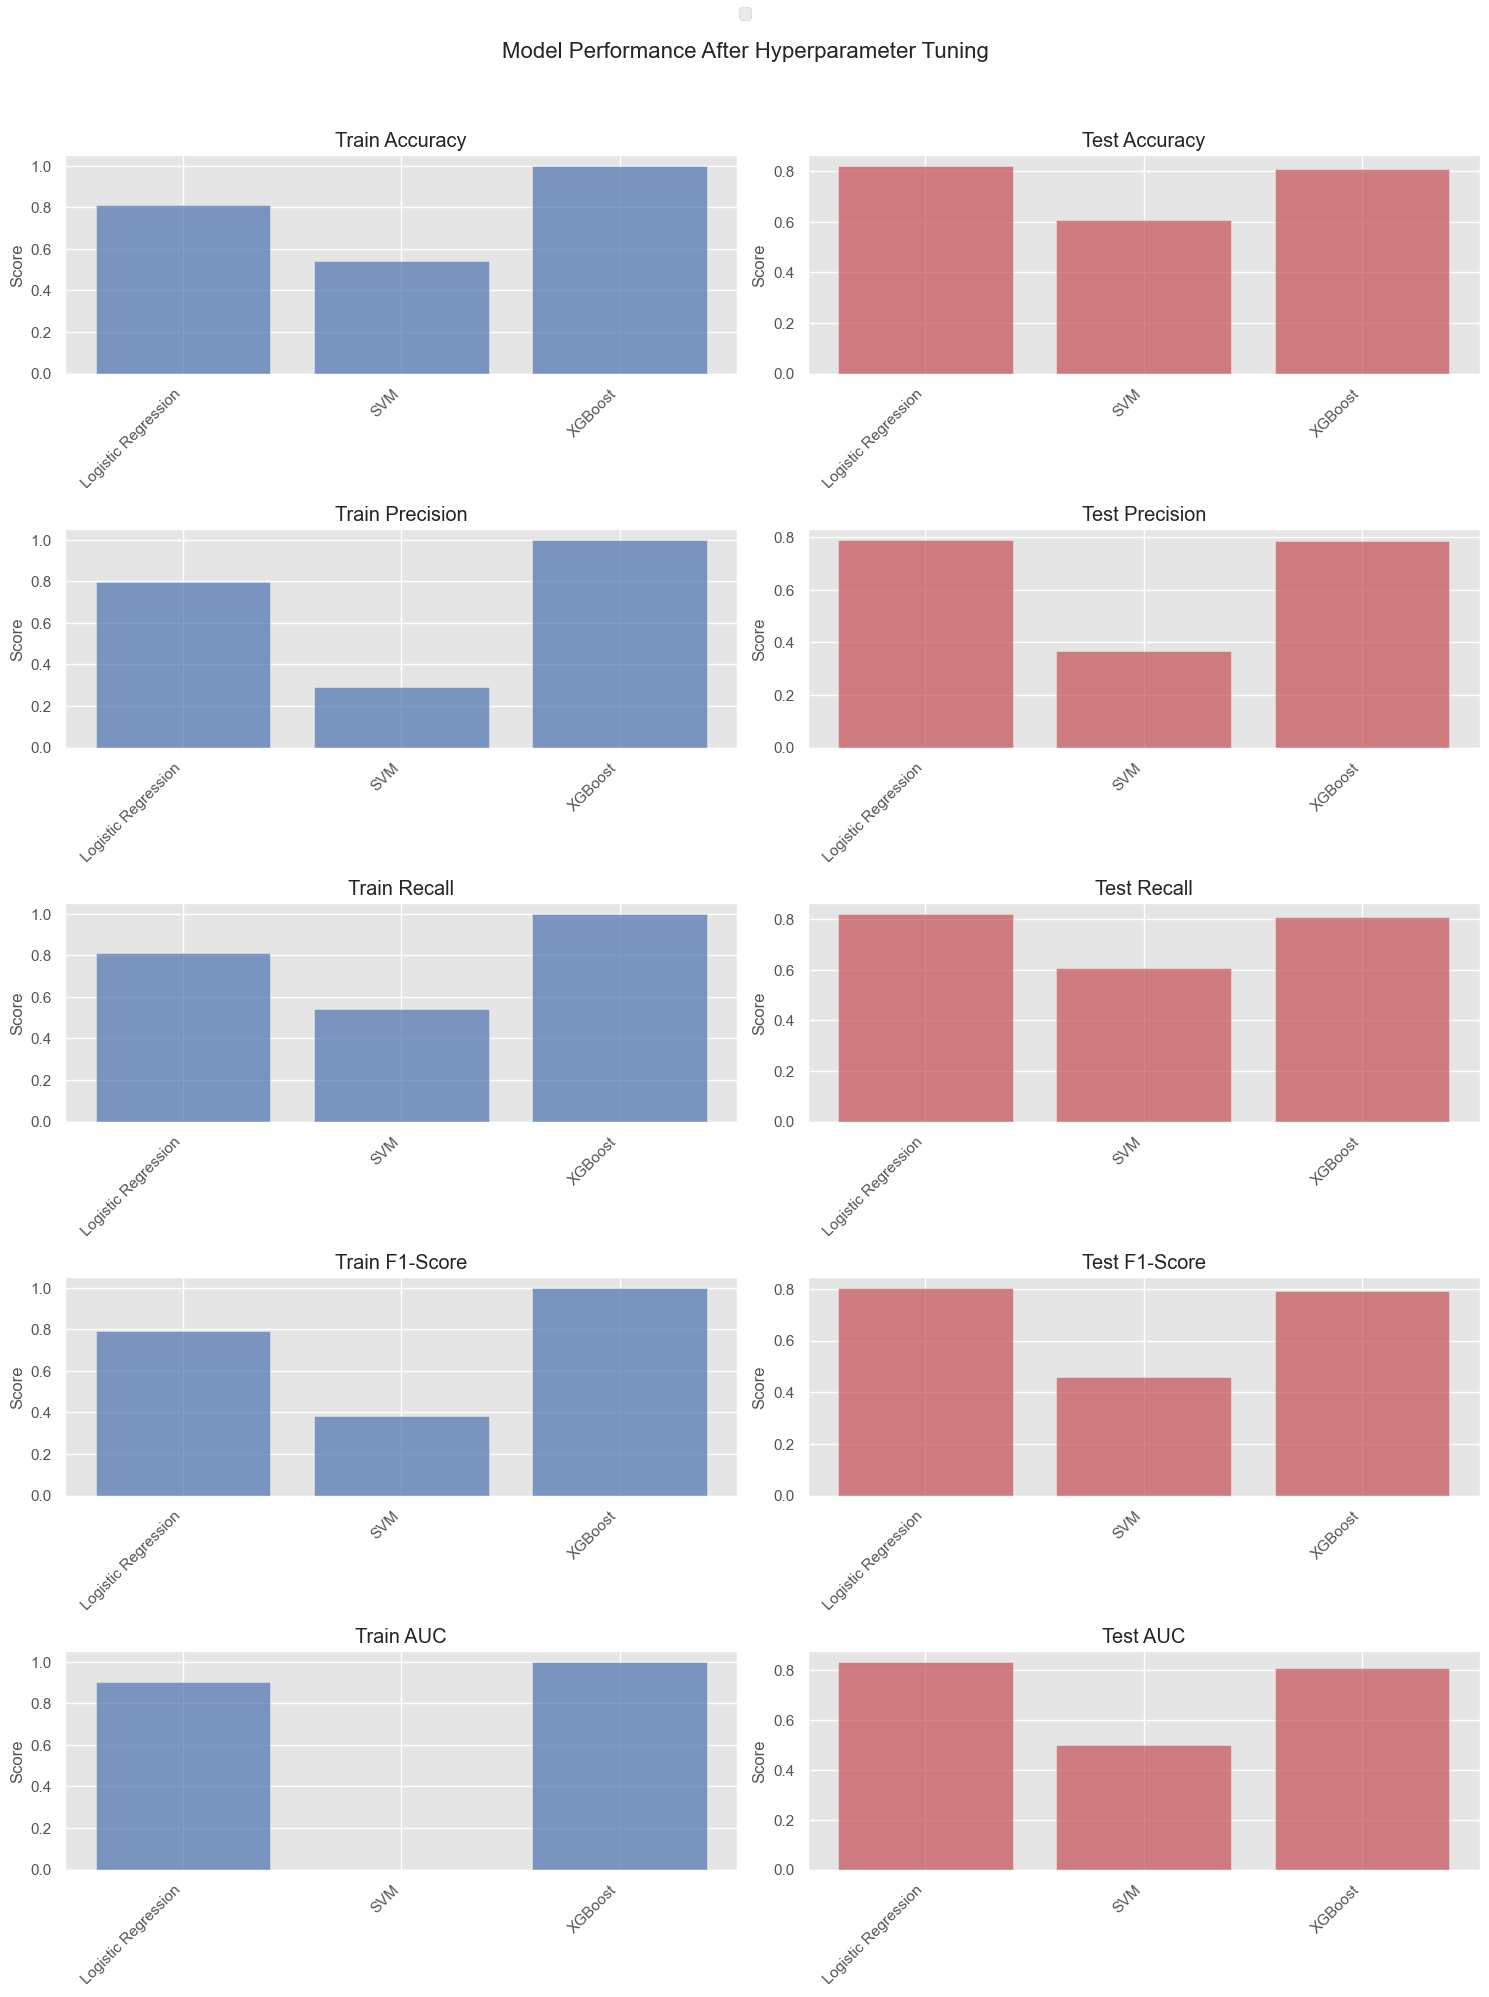

In [159]:
# Reshape the DataFrame to long format
tuned_results_df = results_after_tuning_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Extract the metric type and create a 'Type' column
tuned_results_df['Metric Type'] = tuned_results_df['Metric'].apply(lambda x: x.split(' ')[0])
tuned_results_df['Metric'] = tuned_results_df['Metric'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Pivot table to make it suitable for plotting
pivot_df = tuned_results_df.pivot_table(index='Model', columns=['Metric Type', 'Metric'], values='Score')

# List of metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Model Performance After Hyperparameter Tuning', fontsize=16)

for i, metric in enumerate(metrics):
    ax_train = axes[i, 0]
    ax_test = axes[i, 1]
    
    # Train metrics
    ax_train.bar(pivot_df.index, pivot_df[('Train', metric)], color='b', alpha=0.7)
    ax_train.set_title(f'Train {metric}')
    ax_train.set_ylabel('Score')
    ax_train.set_xticklabels(ax_train.get_xticklabels(), rotation=45, ha='right')
    
    # Test metrics
    ax_test.bar(pivot_df.index, pivot_df[('Test', metric)], color='r', alpha=0.7)
    ax_test.set_title(f'Test {metric}')
    ax_test.set_ylabel('Score')
    ax_test.set_xticklabels(ax_test.get_xticklabels(), rotation=45, ha='right')

# Add a single legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Apply SMOTE

In [142]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Re-train Models:

#### Logistic Regression with SMOTE

In [147]:
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression()

#### SVM model on SMOTE-augmented data

In [165]:
svm_smote = SVC(probability=True)  
svm_smote.fit(X_train_smote, y_train_smote)

SVC(probability=True)

#### XGBoost model on SMOTE-augmented data

In [168]:
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [191]:
# Function to compute metrics
def compute_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    return {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Train F1-Score': f1_score(y_train, y_train_pred, average='weighted'),
        'Test F1-Score': f1_score(y_test, y_test_pred, average='weighted'),
        'Train AUC': roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr'),
        'Test AUC': roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    }

# Compute metrics for models with SMOTE
metrics_after_smote = {}
for model_name, model in [('Logistic Regression_SMOTE', log_reg_smote), ('SVM_SMOTE', svm_smote), ('XGBoost_SMOTE', xgb_smote)]:
    metrics_after_smote[model_name] = compute_metrics(model, X_train_smote, y_train_smote, X_test, y_test)

# Convert to DataFrame
metrics_after_smote_df = pd.DataFrame(metrics_after_smote).T

In [193]:
metrics_after_smote_df

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train AUC,Test AUC
Logistic Regression_SMOTE,0.744015,0.714286,0.745060,0.765067,0.744015,0.714286,0.743253,0.734314,0.881582,0.804468
SVM_SMOTE,0.598527,0.452381,0.600397,0.678915,0.598527,0.452381,0.584283,0.486353,0.804615,0.778671
XGBoost_SMOTE,1.000000,0.797619,1.000000,0.796042,1.000000,0.797619,1.000000,0.795609,1.000000,0.815744


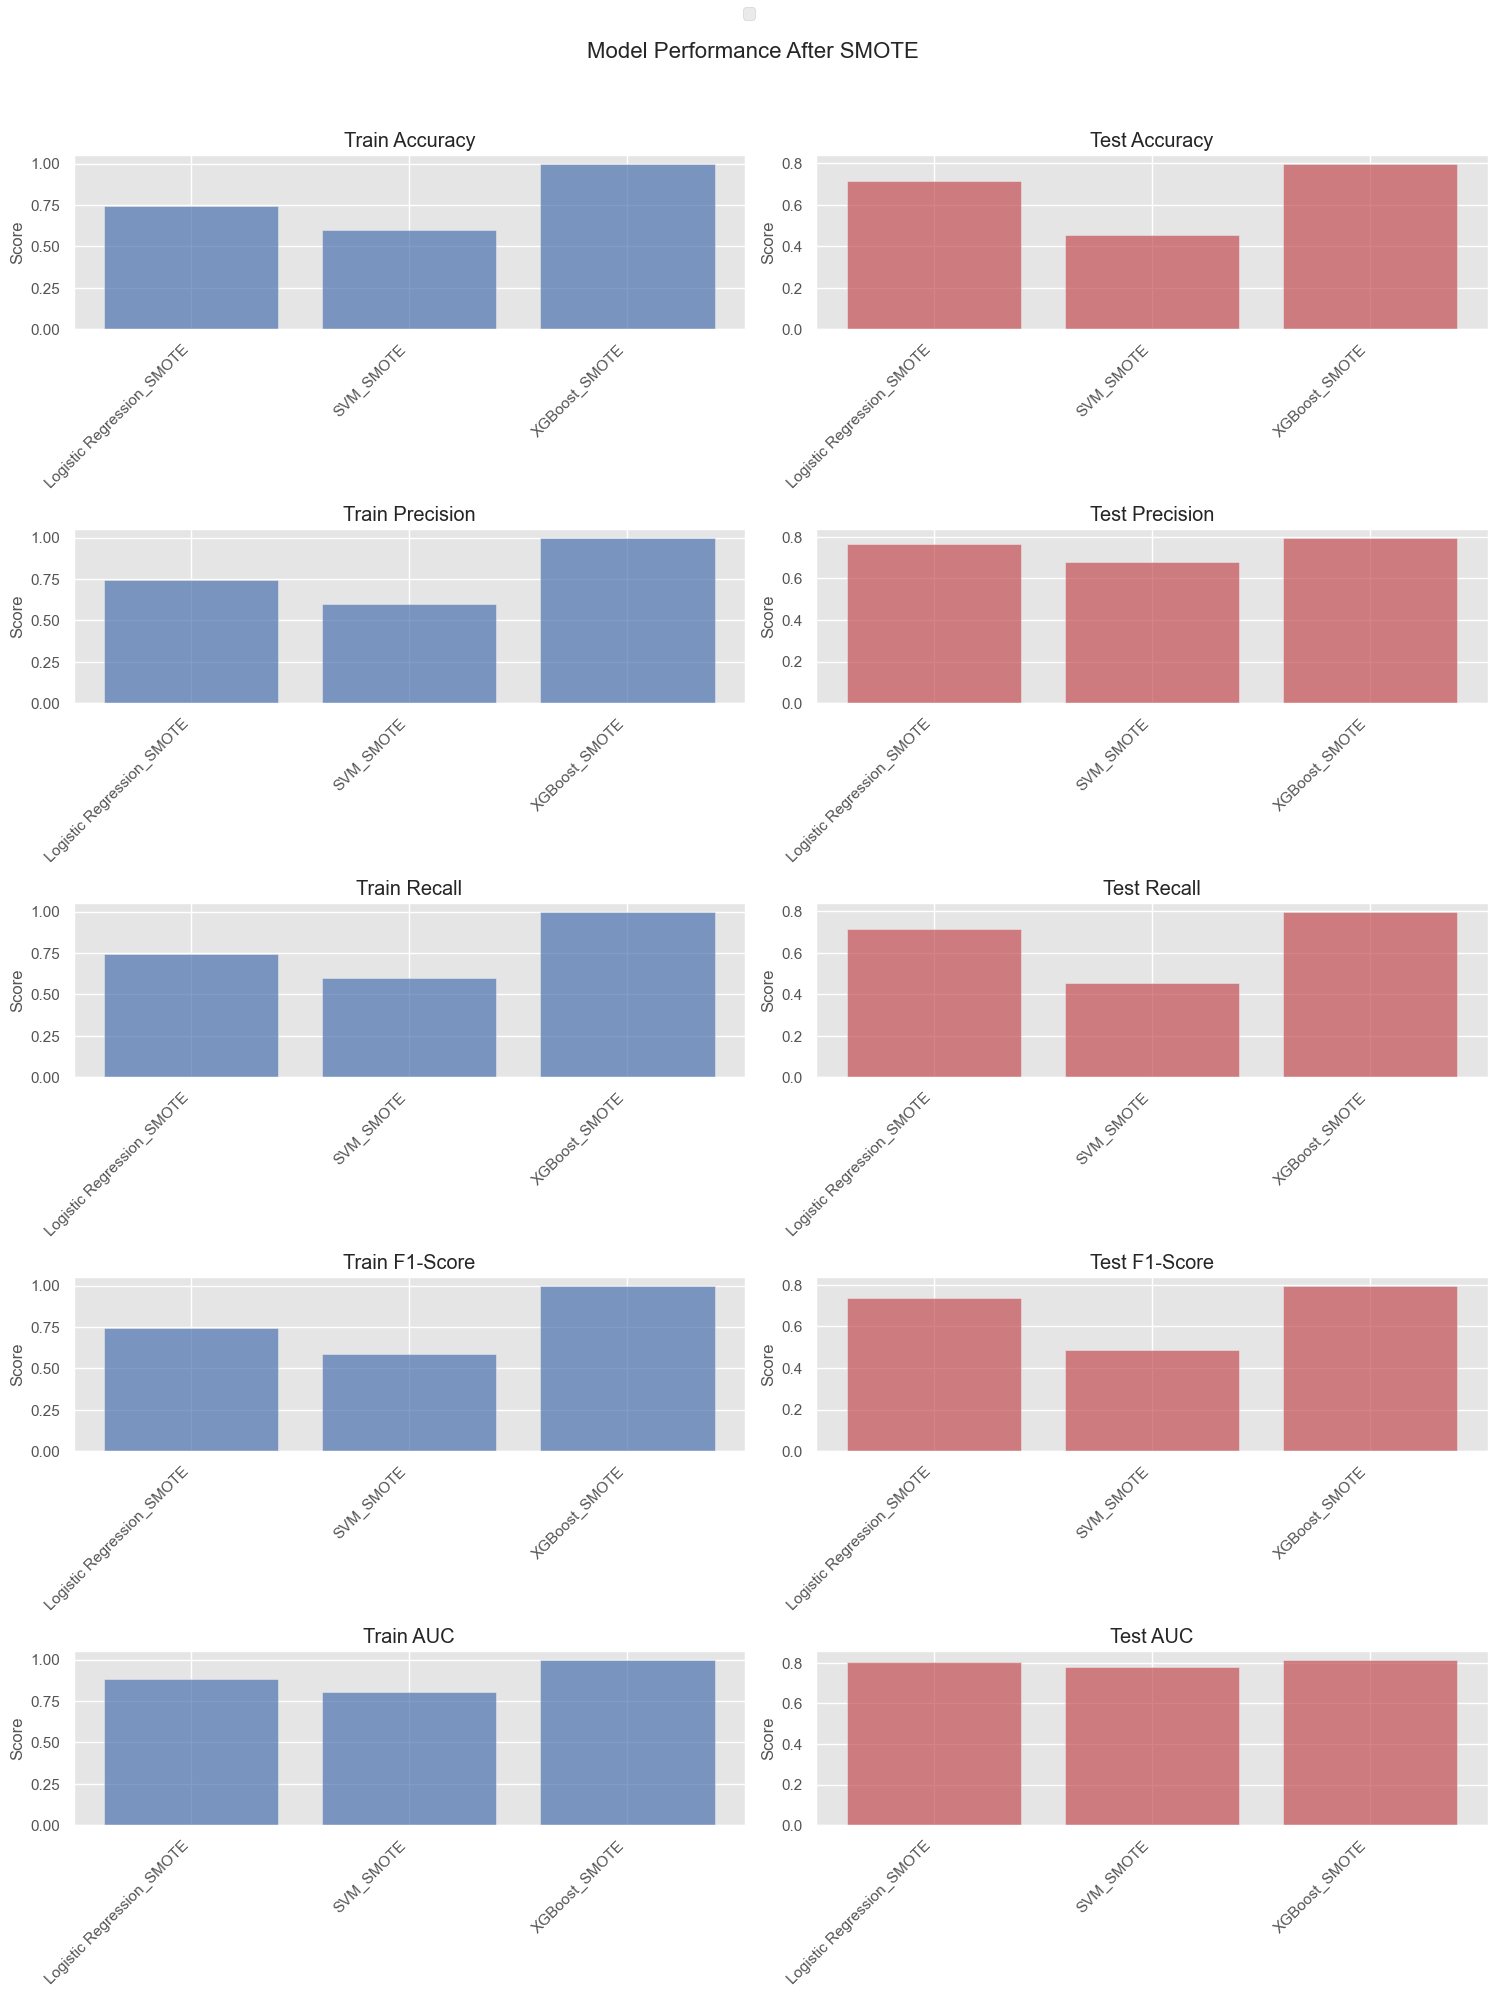

In [235]:
# Reshape the DataFrame to long format
metrics_after_smote_df_long = metrics_after_smote_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_after_smote_df_long.rename(columns={'index': 'Model'}, inplace=True)

# Extract the metric type and create a 'Type' column
metrics_after_smote_df_long['Metric Type'] = metrics_after_smote_df_long['Metric'].apply(lambda x: x.split(' ')[0])
metrics_after_smote_df_long['Metric'] = metrics_after_smote_df_long['Metric'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Pivot table to make it suitable for plotting
pivot_smote_df = metrics_after_smote_df_long.pivot_table(index='Model', columns=['Metric Type', 'Metric'], values='Score')

# List of metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Model Performance After SMOTE', fontsize=16)

for i, metric in enumerate(metrics):
    ax_train = axes[i, 0]
    ax_test = axes[i, 1]
    
    # Train metrics
    if ('Train', metric) in pivot_smote_df.columns:
        ax_train.bar(pivot_smote_df.index, pivot_smote_df[('Train', metric)], color='b', alpha=0.7)
        ax_train.set_title(f'Train {metric}')
        ax_train.set_ylabel('Score')
        ax_train.set_xticklabels(ax_train.get_xticklabels(), rotation=45, ha='right')
    else:
        ax_train.bar(pivot_smote_df.index, [0]*len(pivot_smote_df.index), color='b', alpha=0.7)
        ax_train.set_title(f'Train {metric}')
        ax_train.set_ylabel('Score')
        ax_train.set_xticklabels(ax_train.get_xticklabels(), rotation=45, ha='right')
    
    # Test metrics
    if ('Test', metric) in pivot_smote_df.columns:
        ax_test.bar(pivot_smote_df.index, pivot_smote_df[('Test', metric)], color='r', alpha=0.7)
        ax_test.set_title(f'Test {metric}')
        ax_test.set_ylabel('Score')
        ax_test.set_xticklabels(ax_test.get_xticklabels(), rotation=45, ha='right')
    else:
        ax_test.bar(pivot_smote_df.index, [0]*len(pivot_smote_df.index), color='r', alpha=0.7)
        ax_test.set_title(f'Test {metric}')
        ax_test.set_ylabel('Score')
        ax_test.set_xticklabels(ax_test.get_xticklabels(), rotation=45, ha='right')

# Add a single legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Compare results after tuning and smote

In [241]:
# Combine the DataFrames
combined_df = pd.concat([results_after_tuning_df, metrics_after_smote_df])

In [256]:
combined_df

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train AUC,Test AUC
Logistic Regression,0.811377,0.821429,0.794935,0.790871,0.811377,0.821429,0.793186,0.804636,0.902952,0.835008
SVM,0.541916,0.607143,0.293673,0.368622,0.541916,0.607143,0.380920,0.458730,0.000000,0.500000
XGBoost,1.000000,0.809524,1.000000,0.785921,1.000000,0.809524,1.000000,0.790664,1.000000,0.808787
Logistic Regression_SMOTE,0.744015,0.714286,0.745060,0.765067,0.744015,0.714286,0.743253,0.734314,0.881582,0.804468
SVM_SMOTE,0.598527,0.452381,0.600397,0.678915,0.598527,0.452381,0.584283,0.486353,0.804615,0.778671
XGBoost_SMOTE,1.000000,0.797619,1.000000,0.796042,1.000000,0.797619,1.000000,0.795609,1.000000,0.815744


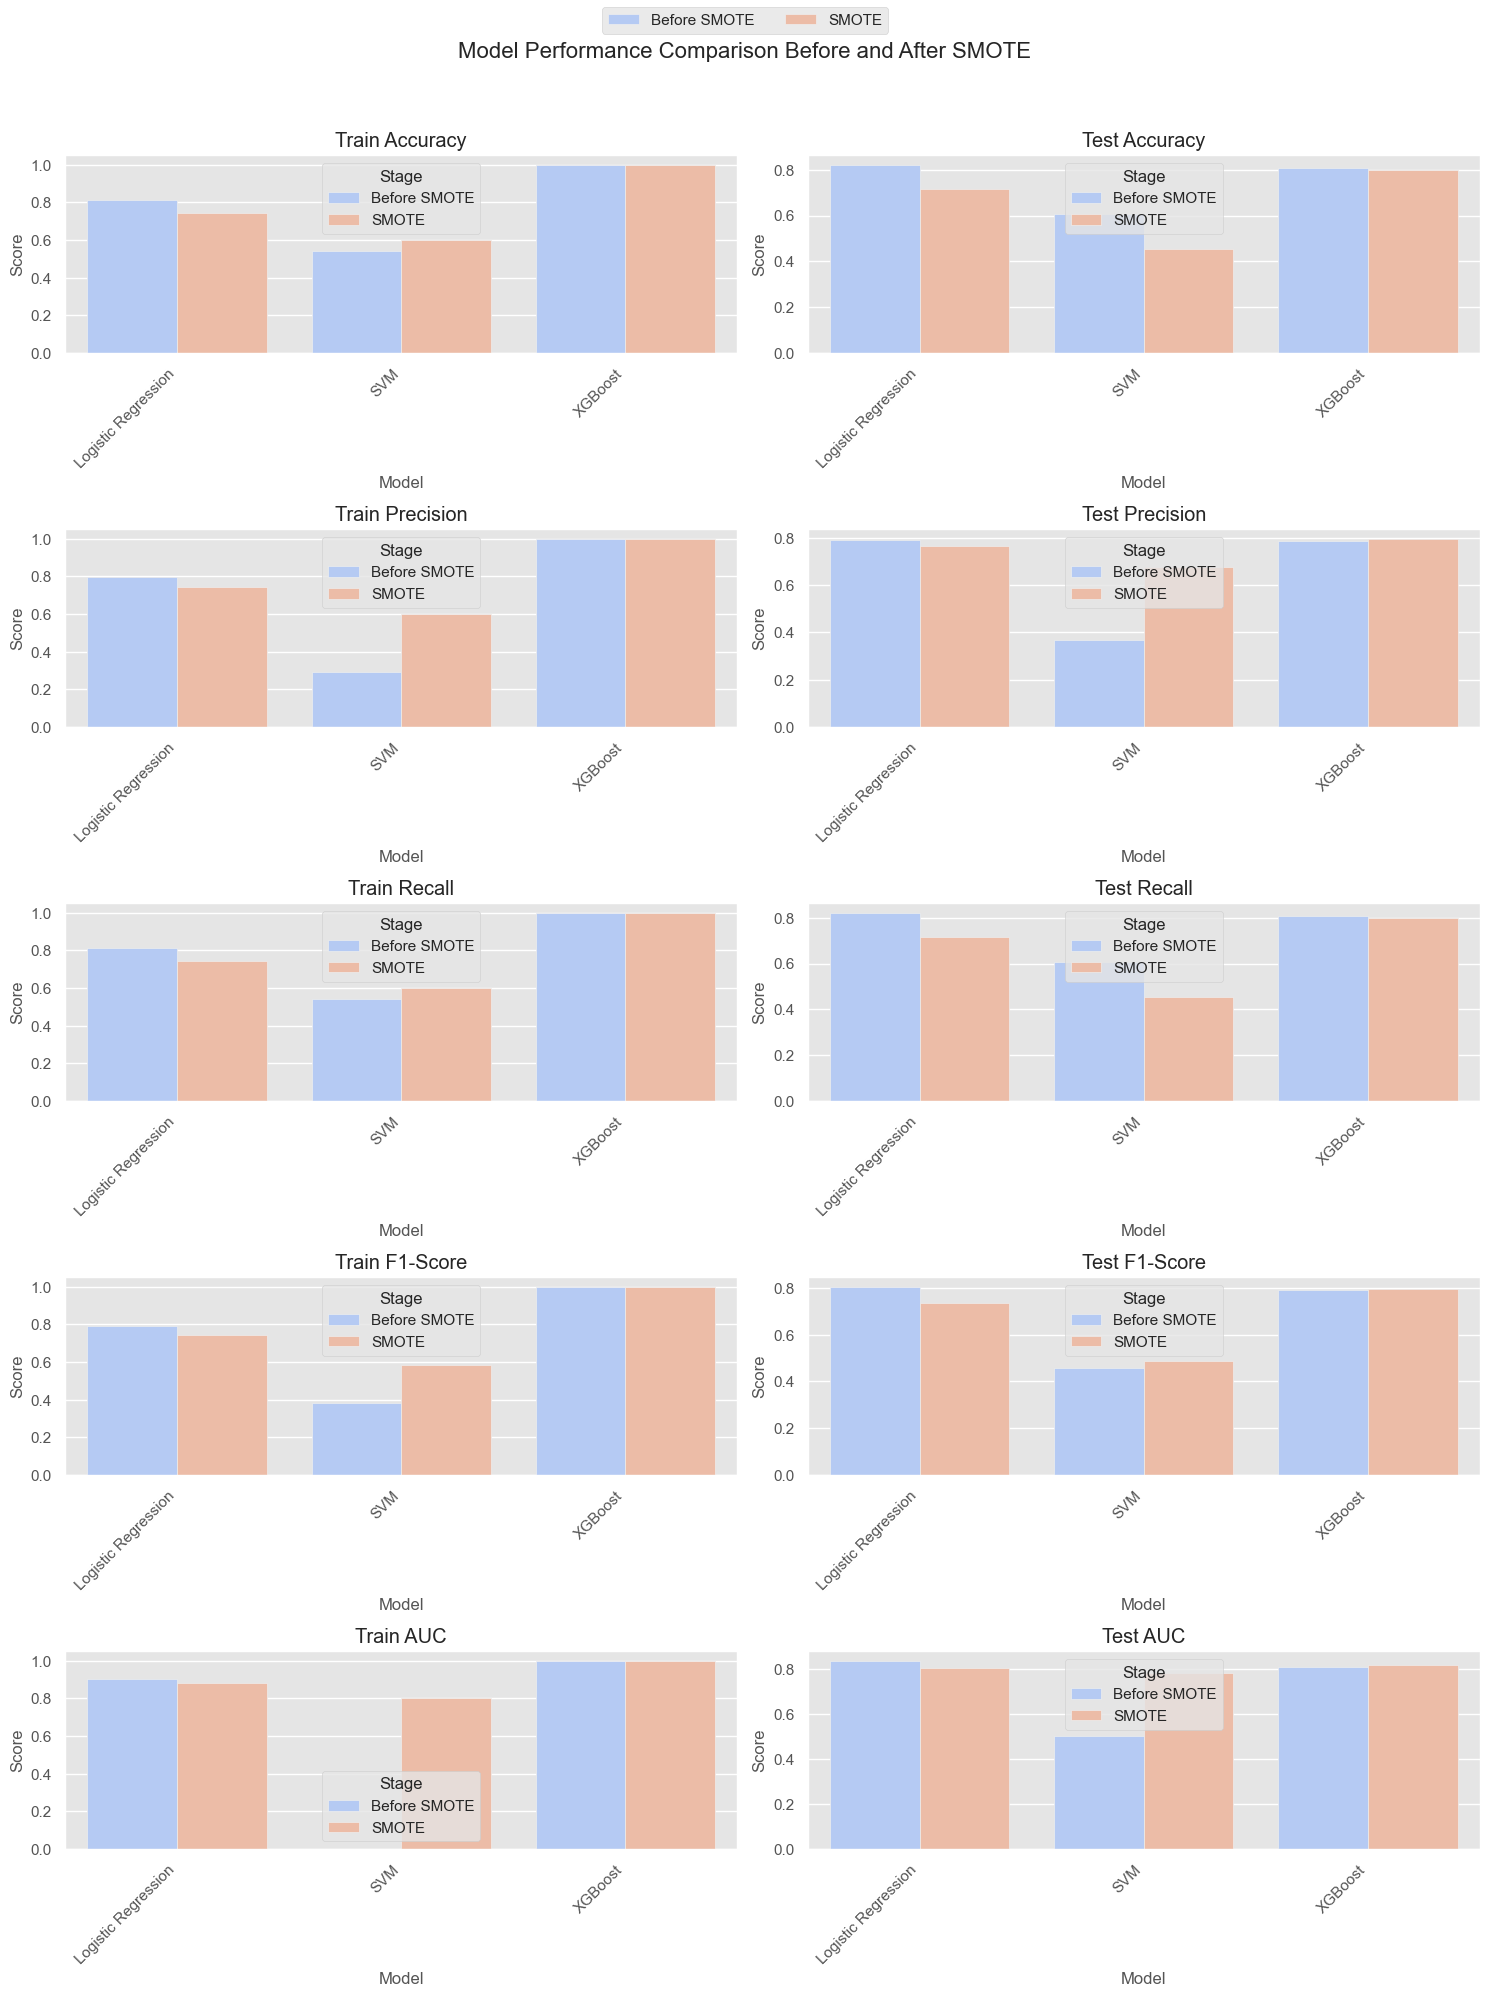

In [260]:
# Reset index to use it as a column for plotting
combined_df_reset = combined_df.reset_index()

# Separate models with and without SMOTE
combined_df_reset['Stage'] = combined_df_reset['index'].apply(lambda x: 'SMOTE' if '_SMOTE' in x else 'Before SMOTE')
combined_df_reset['Model'] = combined_df_reset['index'].apply(lambda x: x.replace('_SMOTE', ''))

# Drop the original index column
combined_df_reset = combined_df_reset.drop(columns='index')

# Reshape the DataFrame to long format for plotting
melted_df = combined_df_reset.melt(id_vars=['Model', 'Stage'], var_name='Metric', value_name='Score')

# Define metrics for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Model Performance Comparison Before and After SMOTE', fontsize=16)

for i, metric in enumerate(metrics):
    ax_train = axes[i, 0]
    ax_test = axes[i, 1]
    
    # Filter data for the metric
    train_metric_data = melted_df[melted_df['Metric'].str.contains(f'Train {metric}')]
    test_metric_data = melted_df[melted_df['Metric'].str.contains(f'Test {metric}')]
    
    # Plot Train metrics
    sns.barplot(data=train_metric_data, x='Model', y='Score', hue='Stage', ax=ax_train, palette='coolwarm')
    ax_train.set_title(f'Train {metric}')
    ax_train.set_ylabel('Score')
    ax_train.set_xticklabels(ax_train.get_xticklabels(), rotation=45, ha='right')
    
    # Plot Test metrics
    sns.barplot(data=test_metric_data, x='Model', y='Score', hue='Stage', ax=ax_test, palette='coolwarm')
    ax_test.set_title(f'Test {metric}')
    ax_test.set_ylabel('Score')
    ax_test.set_xticklabels(ax_test.get_xticklabels(), rotation=45, ha='right')

# Add a single legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### BEST MODEL: Logistic Regression

We choose logistic regression as the best model to predict the patient survival as this is providign better recall in training and test than the other models which captures the noise in the training data.

In [274]:
# Make predictions
y_test_pred_final = best_log_reg.predict(X_test)
y_test_proba_final = best_log_reg.predict_proba(X_test)  # Probabilities for the positive class

In [276]:
# Compute metrics
accuracy = accuracy_score(y_test, y_test_pred_final)
precision = precision_score(y_test, y_test_pred_final, average='weighted')
recall = recall_score(y_test, y_test_pred_final, average='weighted')
f1 = f1_score(y_test, y_test_pred_final, average='weighted')
# For multiclass classification, let us use 'ovr' (one-vs-rest)
auc = roc_auc_score(y_test, y_test_proba_final, multi_class='ovr')

In [280]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8214
Precision: 0.7909
Recall: 0.8214
F1-Score: 0.8046
AUC: 0.8350


### Correlation Analysis

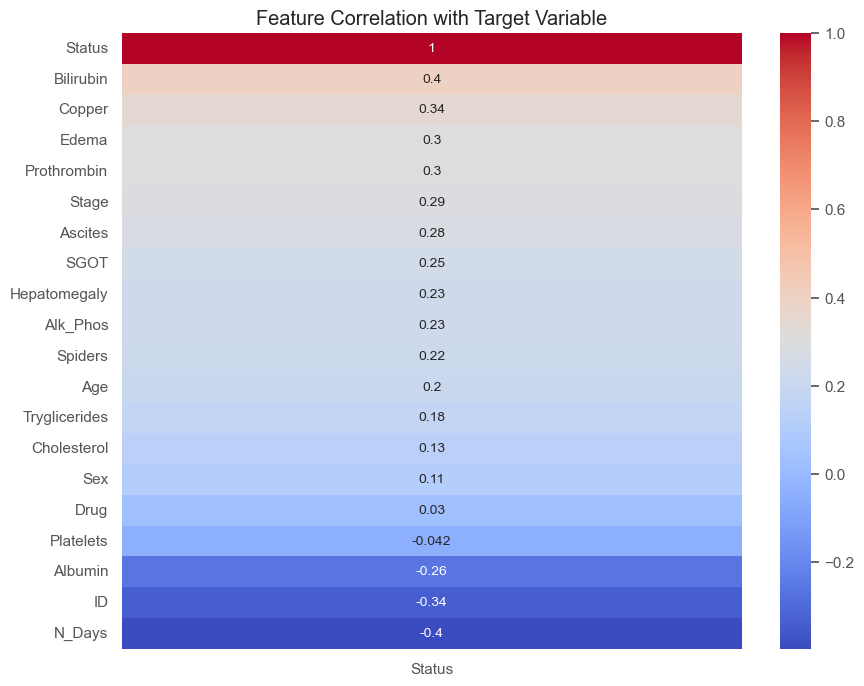

In [283]:
# Calculate correlations
correlations = X_train.copy()
correlations['Status'] = y_train
correlation_matrix = correlations.corr()

# Plot correlation with target variable
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Status']].sort_values(by='Status', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Target Variable')
plt.show()

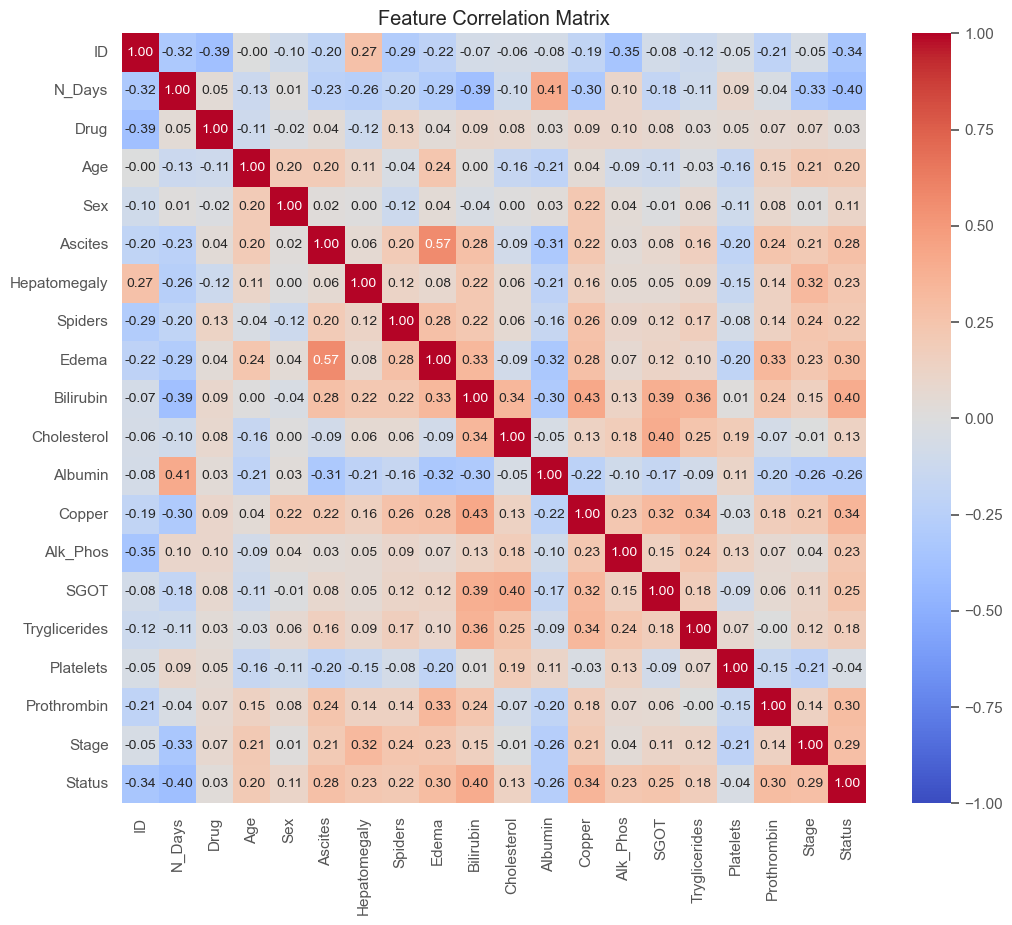

In [297]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

### Coefficient Magnitudes

> In logistic regression, the magnitude of the coefficients can be used as a measure of feature importance. 

Features with larger absolute coefficient values are generally more important.

In [299]:
# Get the coefficients from the logistic regression model
coefficients = best_log_reg.coef_[0]  # best_log_reg is our trained model

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort by the absolute value of coefficients
feature_importance_df['Importance'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

          Feature  Coefficient  Importance
9       Bilirubin    -0.128797    0.128797
17    Prothrombin    -0.050224    0.050224
6    Hepatomegaly    -0.021865    0.021865
18          Stage    -0.019836    0.019836
2            Drug     0.012876    0.012876
0              ID     0.006394    0.006394
11        Albumin    -0.005370    0.005370
8           Edema    -0.004815    0.004815
14           SGOT    -0.004007    0.004007
12         Copper    -0.003022    0.003022
7         Spiders     0.002634    0.002634
5         Ascites    -0.002291    0.002291
16      Platelets    -0.002257    0.002257
15  Tryglicerides     0.002046    0.002046
4             Sex    -0.000977    0.000977
1          N_Days     0.000848    0.000848
10    Cholesterol     0.000389    0.000389
13       Alk_Phos    -0.000010    0.000010
3             Age     0.000002    0.000002


Even though we have found the importance of features this way, we must actually do feature engineering to create new ratios of the clinical and biochemical levels of the features, as it will enhance the understanding of the disease and the status.

<center> END <center>